# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

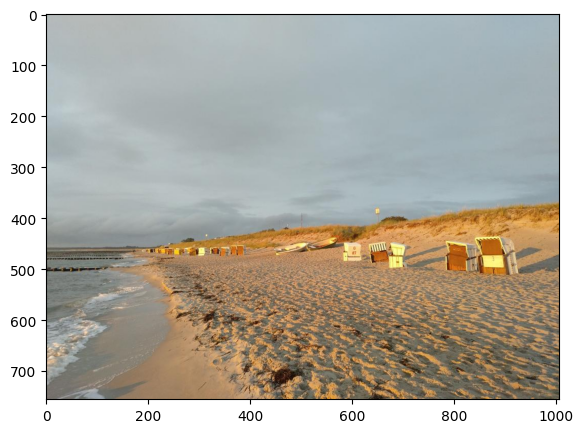

In [2]:
img = cv2.imread('../data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

[252 242 127] [1.01190476 1.05371901 2.00787402]


(<Axes: >, <matplotlib.image.AxesImage at 0x27245c88d50>)

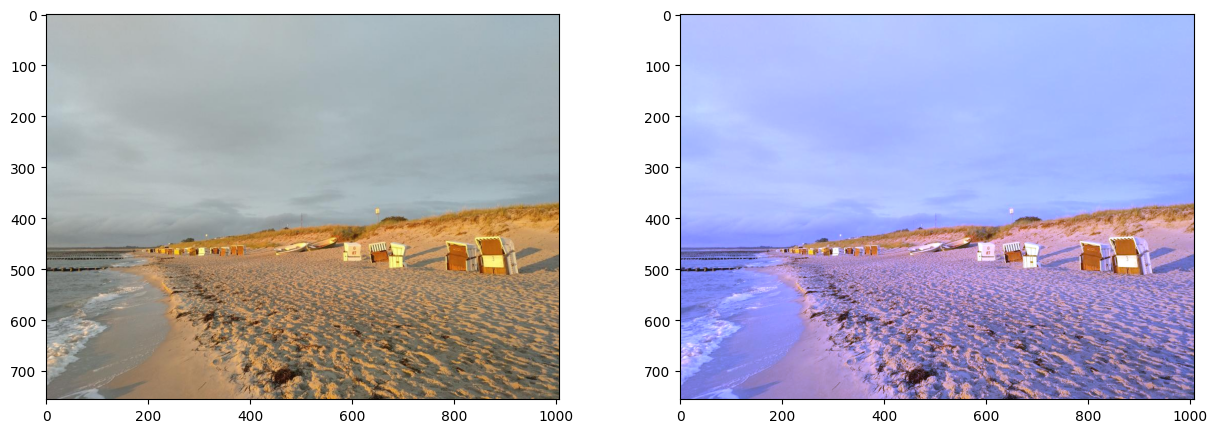

In [5]:
# Define white patch and the coefficients
row, col = 485, 864 
white = img[row, col, :]
coeffs = 255.0/white
print(white, coeffs)

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

162.25918577307465 156.81538170823885 144.0787745653817


(<matplotlib.image.AxesImage at 0x27250e18310>,
 <matplotlib.image.AxesImage at 0x272536788d0>)

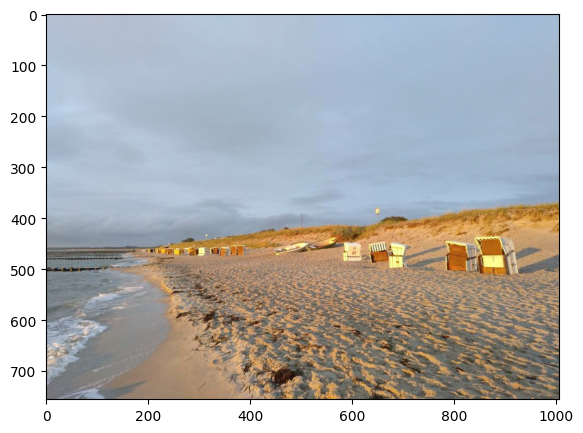

In [16]:
# Load your image
img = cv2.imread('../data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = img[..., 0].mean()
mean_g = img[..., 1].mean()
mean_b = img[..., 2].mean()

print(mean_r,mean_g,mean_b)

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
if mean_r>= mean_g and mean_r>=mean_b:
    coeffs = kr, kg, kb =     1,       mean_r/mean_g,      mean_r/mean_b

if mean_g>= mean_r and mean_g>=mean_b:
    coeffs = kr, kg, kb = mean_g/mean_r,      1,            mean_g/mean_b

if mean_b>=mean_r and mean_b>=mean_g:
    coeffs = kr, kg, kb = mean_b/mean_r,   mean_b/mean_g,         1

# Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)

for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1 

# Show the original and the balanced image side by side
plt.imshow(img),plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

In [ ]:
# Load your image
img = cv2.imread('...')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = 
max_g = 
max_b = 

# Apply scale-by-max balancing and generate the balanced image
balanced =

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)